In [4]:
from bitcoin_utils import initialize_spark_session
spark = initialize_spark_session()

25/05/17 14:05:47 WARN Utils: Your hostname, rajesh resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/05/17 14:05:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/17 14:05:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/17 14:05:49 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.




## Fetches the latest Bitcoin OHLC price data from the CoinGecko API and returns it as a dictionary.


In [18]:
from bitcoin_utils import fetch_price_as_ohlc
fetch_price_as_ohlc()


In [1]:
from bitcoin_utils import start_file_producer
start_file_producer()

## Starts a background thread that fetches and writes Bitcoin OHLC data every 30 seconds 

## Starts the Spark Structured Streaming job to process new Bitcoin data batches while the producer runs in parallel.

In [21]:
from  run_streaming_query_and_writer
run_streaming_query_and_writer()

25/05/14 12:03:16 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-332b5d86-496c-42a2-a18c-4434bf6d6dfb. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
25/05/14 12:03:16 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.


📁 Wrote: Data/stream/ohlc_20250514_120316.json
-------------------------------------------
Batch: 4
-------------------------------------------
+--------------------+--------+--------+--------+--------+-----------+
|            Datetime|    Open|    High|     Low|   Close|     Volume|
+--------------------+--------+--------+--------+--------+-----------+
|2025-05-14 12:03:...|103424.0|104836.0|103166.0|103424.0|32188870881|
+--------------------+--------+--------+--------+--------+-----------+

📁 Wrote: Data/stream/ohlc_20250514_120346.json
-------------------------------------------
Batch: 5
-------------------------------------------
+--------------------+--------+--------+--------+--------+-----------+
|            Datetime|    Open|    High|     Low|   Close|     Volume|
+--------------------+--------+--------+--------+--------+-----------+
|2025-05-14 12:03:...|103425.0|104836.0|103166.0|103425.0|32185909448|
+--------------------+--------+--------+--------+--------+-----------+



## Displays a preview of the ingested historical Bitcoin price data to verify format and content.

In [35]:
from  preview_historical_data
preview_historical_data()

+--------------------+--------+--------+--------+--------+-----------+
|            Datetime|    Open|    High|     Low|   Close|     Volume|
+--------------------+--------+--------+--------+--------+-----------+
|2025-05-12T00:33:...|104425.0|104751.0|103480.0|104425.0|27069038795|
|2025-05-12T00:34:...|104433.0|104751.0|103480.0|104433.0|27058350902|
|2025-05-12T00:34:...|104433.0|104751.0|103480.0|104433.0|27058350902|
|2025-05-12T00:35:...|104487.0|104751.0|103480.0|104487.0|27076393899|
|2025-05-12T00:35:...|104496.0|104751.0|103480.0|104496.0|27051403423|
+--------------------+--------+--------+--------+--------+-----------+
only showing top 5 rows



9048

## Performs hourly, daily, and rolling window aggregations on Bitcoin price data to analyze trends over time.

In [24]:
from bitcoin_utils import aggregate_hourly_daily_moving_average

aggregate_hourly_daily_moving_average()

🔹 Hourly Aggregation:
+----+-----------------+----------------+----------------+
|Hour|Hourly_Avg_Close |Hourly_Min_Close|Hourly_Max_Close|
+----+-----------------+----------------+----------------+
|0   |78023.8886456937 |53615.59375     |106778.234375   |
|1   |78562.56037303664|52753.21484375  |107157.2109375  |
|2   |77397.90276227679|51460.3671875   |107023.7890625  |
|3   |77426.934375     |52740.9140625   |108181.09375    |
|4   |77462.91782962329|52760.20703125  |108018.796875   |
|5   |77487.1020119863 |52449.5546875   |107810.40625    |
|6   |77480.81536815068|51367.140625    |108097.4375     |
|7   |77483.34096746576|51435.578125    |107145.6015625  |
|8   |77489.18234160959|49842.5234375   |107791.046875   |
|9   |77445.95768586882|51981.109375    |108240.0859375  |
|10  |77505.89995719178|54065.2578125   |106493.2890625  |
|11  |83109.50673347163|53773.28125     |106910.1796875  |
|12  |77717.5823603091 |53921.46484375  |107441.65625    |
|13  |77533.80013912672|53948.7031

## Trains a Gradient-Boosted Tree Regressor using PySpark MLlib to predict future Bitcoin prices and evaluates its performance.

In [30]:
from bitcoin_utils import train_and_evaluate_gbt_regressor

train_and_evaluate_gbt_regressor()

+-----------------+--------------+------------------+
|timestamp_numeric|Close         |prediction        |
+-----------------+--------------+------------------+
|1714528800       |59856.140625  |61829.892734708694|
|1714543200       |59568.12890625|60323.12458847046 |
|1714550400       |57030.30078125|60154.633999842954|
|1714568400       |57254.25390625|60231.88688134908 |
|1714590000       |56858.4375    |60353.252334637706|
|1714604400       |58288.07421875|60294.363766166236|
|1714626000       |57440.5078125 |60447.8397610807  |
|1714647600       |58557.0078125 |60108.4731117693  |
|1714683600       |59121.5078125 |60662.49750598745 |
|1714687200       |59328.3125    |60791.970887780866|
+-----------------+--------------+------------------+
only showing top 10 rows

✅ GBT R²: 0.9679 (96.79%) variance explained
✅ GBT RMSE: 2877.35


## Generates a time-series plot comparing actual Bitcoin prices against GBT model predictions and saves it as an image.

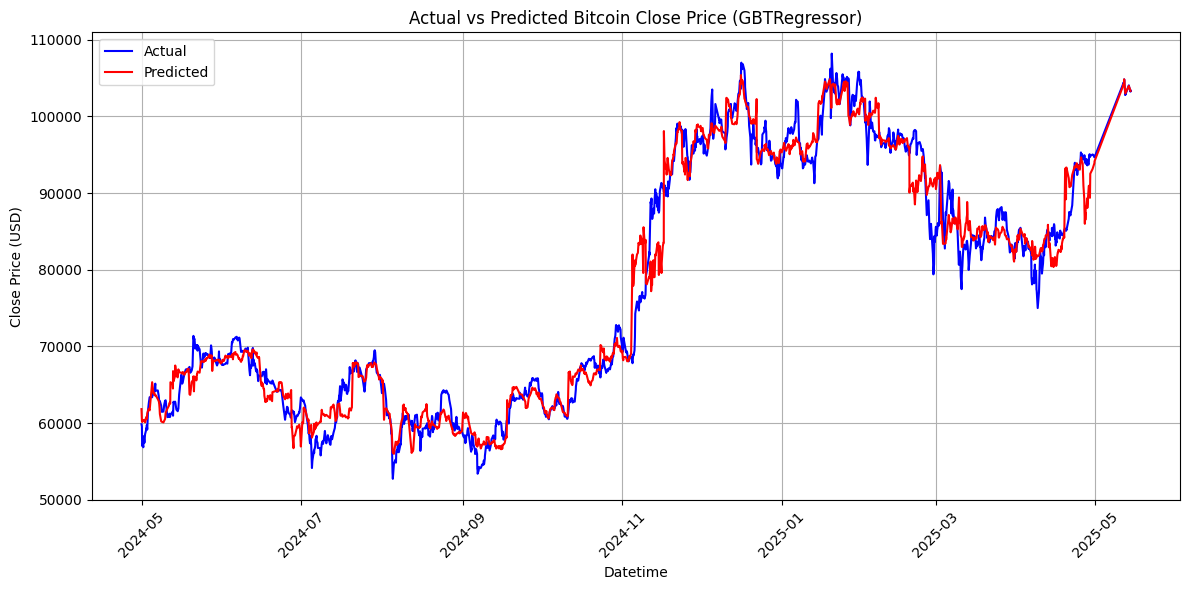

In [31]:
from bitcoin_utils import plot_actual_vs_predicted_prices

plot_actual_vs_predicted_prices()